In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df_unclean=pd.read_csv('/content/drive/MyDrive/Crime Dataset/Crimes_-_2001_to_Present.csv')

In [ ]:
df_unclean.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
df = df_unclean[(df_unclean['Year'] >= 2015) & (df_unclean['Year'] <= 2021)]

In [ ]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.6700,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.7654,"(41.895080471, -87.765400451)"


In [ ]:
df.to_csv('trim_data.csv',index=False)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
data_small=pd.read_csv('/content/trim_data.csv')

In [ ]:
data_small.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
data_small=data_small.drop(["Case Number", "Domestic", "Beat", "Updated On", "Arrest"], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data_small.head(2)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.6700,"(41.815117282, -87.669999562)"
1,10224739,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.7654,"(41.895080471, -87.765400451)"


In [ ]:
datagb_crime=data_small.groupby("Primary Type")["Primary Type"].count()
datagb_crime.sort_values(ascending=False, inplace=True)
datagb_crime.head(50)

Primary Type
THEFT                                393042
BATTERY                              329715
CRIMINAL DAMAGE                      193189
ASSAULT                              134692
DECEPTIVE PRACTICE                   128649
OTHER OFFENSE                        112606
NARCOTICS                             89787
BURGLARY                              77267
MOTOR VEHICLE THEFT                   72221
ROBBERY                               66928
CRIMINAL TRESPASS                     40825
WEAPONS VIOLATION                     40680
OFFENSE INVOLVING CHILDREN            15777
PUBLIC PEACE VIOLATION                10290
SEX OFFENSE                            7664
INTERFERENCE WITH PUBLIC OFFICER       7152
CRIM SEXUAL ASSAULT                    6804
HOMICIDE                               4678
PROSTITUTION                           4627
CRIMINAL SEXUAL ASSAULT                3942
ARSON                                  3277
LIQUOR LAW VIOLATION                   1537
STALKING           

In [ ]:
crime_list=datagb_crime.index.values[0:25].tolist()
data_small=data_small[data_small["Primary Type"].isin(crime_list)]

In [ ]:
data_small=data_small[data_small["Primary Type"]!="OTHER OFFENSE"]

In [ ]:
severe_crime_list=["ARSON", "ASSAULT", "BATTERY", "CRIM SEXUAL ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", "HOMICIDE", "ROBBERY"]
data_small["severe"]=np.where(data_small['Primary Type'].isin(severe_crime_list), 1, 0)
data_small.head(5)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1
1,10224739,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",0
2,11646166,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,6.0,8.0,44.0,06,NaN,NaN,2018,NaN,NaN,NaN,0
3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0
4,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1


In [ ]:
print(len(data_small.groupby("Location Description")["Location Description"].count().index.values))

193


In [ ]:
datagb_location=data_small.groupby("Location Description")["Location Description"].count()
datagb_location.sort_values(ascending=False, inplace=True)
datagb_location.head(50)

Location Description
STREET                                    378023
RESIDENCE                                 251737
APARTMENT                                 231733
SIDEWALK                                  135433
OTHER                                      49133
SMALL RETAIL STORE                         41857
PARKING LOT/GARAGE(NON.RESID.)             38978
RESTAURANT                                 37976
ALLEY                                      34887
VEHICLE NON-COMMERCIAL                     28645
DEPARTMENT STORE                           27065
RESIDENTIAL YARD (FRONT/BACK)              25920
RESIDENCE PORCH/HALLWAY                    23735
GAS STATION                                22949
RESIDENCE-GARAGE                           21435
GROCERY FOOD STORE                         20596
SCHOOL, PUBLIC, BUILDING                   17536
PARK PROPERTY                              11954
CONVENIENCE STORE                          11722
BAR OR TAVERN                              11562

In [ ]:
location_list=datagb_location.index.values[0:25].tolist()
data_small=data_small[data_small["Location Description"].isin(location_list)]
data_small.shape

(1470958, 18)

In [ ]:
print(data_small.groupby("District")["District"].count())
print(data_small.groupby("Community Area")["Community Area"].count())

District
1.0      70939
2.0      63014
3.0      72445
4.0      83286
5.0      63463
6.0      94752
7.0      80068
8.0      92087
9.0      65871
10.0     69653
11.0    105693
12.0     72352
14.0     53496
15.0     60822
16.0     43630
17.0     42514
18.0     74946
19.0     66709
20.0     25201
22.0     46912
24.0     44175
25.0     78888
31.0        41
Name: District, dtype: int64
Community Area
1.0     21904
2.0     19767
3.0     19741
4.0     10393
5.0      7575
        ...  
73.0    17674
74.0     3134
75.0    11242
76.0     3144
77.0    14561
Name: Community Area, Length: 77, dtype: int64


In [ ]:
datagb_destrict=data_small.groupby("District")["District"].count()
district_list=datagb_destrict.index.values[0:22].tolist()
data_small=data_small[data_small["District"].isin(district_list)]
data_small.shape

(1470916, 18)

In [ ]:
data_small["District"]='D'+data_small['District'].astype(str)
data_small.head(2)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,D9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67,"(41.815117282, -87.669999562)",1
2,11646166,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,D6.0,8.0,44.0,06,NaN,NaN,2018,NaN,NaN,NaN,0


In [ ]:
dummydf=pd.get_dummies(data_small,columns=["Primary Type","District"])
dummydf=dummydf.join(data_small[["District","Primary Type"]])
print(dummydf.shape)
dummydf.head(2)

(1470916, 64)


,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY
2,11646166,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,OVER $500,RESIDENCE,8.0,44.0,06,NaN,NaN,2018,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,THEFT


In [ ]:
timedataf=dummydf.copy()
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
dummydf["time_24hour"]=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H:%M"))
dummydf["Timeblock"]=dummydf.Date.apply(lambda row: str(3*int(int(datetime.strptime(row, format).strftime("%H"))/3)))
dummydf['Date_no_time']=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%Y%m%d"))
dummydf["Weekday"]=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%A"))
dummydf=pd.get_dummies(dummydf,columns=["Timeblock","Weekday"])
dummydf.shape

(1470916, 81)

In [ ]:
dummydf.to_csv('datap1.csv')

In [ ]:
chicago =pd.read_csv('datap1.csv')

In [ ]:
chicago = chicago.dropna()
chicago.shape

(1450801, 82)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
chicago =pd.read_csv('/content/datap1.csv')

In [ ]:
chicago = chicago.dropna()
chicago.shape

(1450801, 82)

In [ ]:
chicago_lati = np.array(chicago["Latitude"])

In [ ]:
chicago_longi = np.array(chicago["Longitude"])

In [ ]:
chicago_lat_long = zip(chicago_lati, chicago_longi)

In [ ]:
chicago_lat_long_list = list(chicago_lat_long)

In [ ]:
chicago_lat_long_list

[(41.815117282, -87.669999562),
 (41.937405765, -87.716649687),
 (41.881903443, -87.755121152),
 (41.744378879, -87.658430635),
 (41.914635603, -87.681630909),
 (41.851988885, -87.689219118),
 (41.88281374, -87.704325717),
 (41.763647552, -87.722344693),
 (41.975968415, -87.768014257),
 (41.809678314, -87.593638934),
 (41.907127255, -87.678232016),
 (41.748097343, -87.662166183),
 (41.893869916, -87.754341096),
 (41.707490122, -87.559650325),
 (41.733173536, -87.665421067),
 (41.949429769, -87.775435529),
 (41.713031786, -87.536487809),
 (41.972552295, -87.751076926),
 (41.713031786, -87.536487809),
 (41.766247597, -87.575997062),
 (41.713127829, -87.536486623),
 (41.756330319, -87.552716204),
 (41.758420222, -87.565152335),
 (41.75135862, -87.560164545),
 (41.752596188, -87.554055126),
 (41.875367424, -87.627620993),
 (41.782597483, -87.638879769),
 (41.901851233, -87.667456951),
 (41.880252868, -87.69924661),
 (41.763647552, -87.722344693),
 (41.967448012, -87.732951137),
 (41.984956

In [ ]:
stations_array = [(41.8583725929, -87.627356171), (41.8018110912, -87.6305601801), 
                  (41.7664308925, -87.6057478606), (41.7079332906, -87.5683491228),
                  (41.6927233639, -87.6045058667),
                 (41.7521368378, -87.6442289066), (41.7796315359, -87.6608870173),
                  (41.778987189, -87.7088638153),(41.8373944311, -87.6464077068),
                  (41.8566845327, -87.708381958),(41.8735822883, -87.705488126),
                  (41.8629766244, -87.6569725149),(41.9211033246, -87.6974518223),
                  (41.8800834614, -87.768199889),(41.9740944511, -87.7661488432),
                  (41.9660534171, -87.728114561),(41.9032416531, -87.6433521393),
                  (41.9474004564, -87.651512018),(41.9795495131, -87.6928445094),
                  (41.6914347795, -87.6685203937), (41.9997634842, -87.6713242922),
                  (41.9186088912, -87.765574479)]

In [ ]:
station_array = np.array (stations_array)

In [ ]:
chicago["Location"] = chicago_lat_long_list

In [ ]:
chicago.head(2)

,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.71665,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
%time
from math import radians, sin, cos, asin, sqrt, pi, atan2
import itertools
from timeit import Timer

distance = []
earth_radius_miles = 3956.0

x = chicago["Location"]
y = station_array 

def get_shortest_in(needle, haystack):
    dlat = np.radians(haystack[:,0]) - radians(needle[0])
    dlon = np.radians(haystack[:,1]) - radians(needle[1])
    a = np.square(np.sin(dlat/2.0)) + cos(radians(needle[0])) * np.cos(np.radians(haystack[:,0])) * np.square(np.sin(dlon/2.0))
    great_circle_distance = 2 * np.arcsin(np.minimum(np.sqrt(a), np.repeat(1, len(a))))
    d = earth_radius_miles * great_circle_distance
    return np.min(d)
def donumpy():
    get_shortest_in(x, y)
    
for i in x:
    distance.append(get_shortest_in(i, y))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [ ]:
chicago["closest_station"] = distance
chicago.head()

,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384
2,3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488
3,4,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974
4,5,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710
5,6,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421


In [ ]:
chicago.to_csv('datap3.csv', index=False)

In [ ]:
chicago.head()

,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384
2,3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488
3,4,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974
4,5,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710
5,6,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421


In [ ]:
chicago.shape

(1450801, 83)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
smalldf = chicago
inc_edu_age = pd.read_csv('/content/drive/MyDrive/Crime Dataset/hardship_index.csv',index_col=0)

In [ ]:
smalldf=smalldf.drop(["Unnamed: 0"], axis=1)

In [ ]:
inc_edu_age.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 78 entries, 39.0 to nan
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY AREA NAME                           78 non-null     object 
 1   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 2   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 3   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 4   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 5   PER CAPITA INCOME                             78 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.3+ KB


In [ ]:
smalldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450801 entries, 0 to 1470908
Data columns (total 82 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   ID                                             1450801 non-null  int64  
 1   Date                                           1450801 non-null  object 
 2   Block                                          1450801 non-null  object 
 3   IUCR                                           1450801 non-null  object 
 4   Description                                    1450801 non-null  object 
 5   Location Description                           1450801 non-null  object 
 6   Ward                                           1450801 non-null  float64
 7   Community Area                                 1450801 non-null  float64
 8   FBI Code                                       1450801 non-null  object 
 9   X Coordinate            

In [ ]:
smalldf.head()

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488
3,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974
4,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710
5,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421


In [ ]:
inc_edu_age

,COMMUNITY AREA NAME,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
HARDSHIP INDEX,,,,,,
39.0,Rogers Park,23.6,18.2,8.7,27.5,23939
46.0,West Ridge,17.2,20.8,8.8,38.5,23040
20.0,Uptown,24.0,11.8,8.9,22.2,35787
17.0,Lincoln Square,10.9,13.4,8.2,25.5,37524
6.0,North Center,7.5,4.5,5.2,26.2,57123
...,...,...,...,...,...,...
16.0,Mount Greenwood,3.4,4.3,8.7,36.8,34381
30.0,Morgan Park,13.2,10.8,15.0,40.3,27149
24.0,O'Hare,15.4,10.9,7.1,30.3,25828


In [ ]:
inc_edu_age.reset_index(inplace=True)

In [ ]:
inc_edu_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HARDSHIP INDEX                                77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 3   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 6   PER CAPITA INCOME                             78 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
smalldf.head()

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488
3,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974
4,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710
5,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421


In [ ]:
smalldf["Income"]=smalldf["Community Area"].apply(lambda row: inc_edu_age.iloc[int(row)-1].iloc[6])

In [ ]:
smalldf.head(2)

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.71665,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039


In [ ]:
smalldf['HARDSHIP INDEX']=smalldf["Community Area"].apply(lambda row: inc_edu_age.iloc[int(row)-1].iloc[0])

In [ ]:
smalldf.head(2)

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765,91.0
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.71665,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039,42.0


In [ ]:
smalldf['Under18_over64']=smalldf["Community Area"].apply(lambda row: inc_edu_age.iloc[int(row)-1].iloc[5])

In [ ]:
smalldf.head(2)

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765,91.0,38.9
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.71665,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039,42.0,31.0


In [ ]:
smalldf['Unemployed']=smalldf["Community Area"].apply(lambda row: inc_edu_age.iloc[int(row)-1].iloc[4])

In [ ]:
smalldf.head(10)

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765,91.0,38.9,23.0
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039,42.0,31.0,9.2
3,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974,15957,73.0,37.9,22.6
4,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710,15528,74.0,41.9,28.3
5,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421,43198,10.0,21.7,6.6
6,10224744,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,RETAIL THEFT,GROCERY FOOD STORE,25.0,31.0,06,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D10.0,THEFT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.037464,16444,76.0,32.6,15.8
7,10224745,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,STRONGARM - NO WEAPON,STREET,27.0,27.0,03,1155536.0,1900515.0,2015,41.882814,-87.704326,"(41.88281374, -87.704325717)",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D12.0,ROBBERY,11:30,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.640183,12961,83.0,43.2,19.6
8,10224746,

In [ ]:
smalldf['House_below_poverty']=smalldf["Community Area"].apply(lambda row: inc_edu_age.iloc[int(row)-1].iloc[2])

In [ ]:
smalldf.head(2)

,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.67000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765,91.0,38.9,23.0,29.0
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.71665,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039,42.0,31.0,9.2,15.3


In [ ]:
smalldf.head()
print(smalldf.shape)
smalldf=smalldf[smalldf["Location Description"]!="OTHER"]
smalldf=pd.get_dummies(smalldf,columns=["Location Description"])
print(smalldf.shape)

(1450801, 87)
(1402876, 110)


In [ ]:
smalldf.head(5)

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384,12765,91.0,38.9,23.0,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488,20039,42.0,31.0,9.2,15.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974,15957,73.0,37.9,22.6,28.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710,15528,74.0,41.9,28.3,27.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
smalldf.to_csv('chicago_final_clean.csv', index=False)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

In [ ]:
crimedata = pd.read_csv('/content/datap3.csv')
print(crimedata.shape)
crimedata.head(5)

(1450801, 83)


,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,BATTERY,13:30,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.959384
1,3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,NARCOTICS,12:45,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.496488
2,4,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,SIMPLE,APARTMENT,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D15.0,ASSAULT,13:00,20150905,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.683974
3,5,10224742,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,FORCIBLE ENTRY,RESIDENCE,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,BURGLARY,10:55,20150905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.906710
4,6,10224743,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,32.0,24.0,05,1161628.0,1912157.0,2015,41.914636,-87.681631,"(41.914635603, -87.681630909)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BURGLARY,18:00,20150904,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.927421


In [ ]:
crimetypegb=crimedata.groupby(["Primary Type"])["Primary Type"].count()/len(crimedata)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)

Primary Type
THEFT                               23.959109
BATTERY                             20.711455
CRIMINAL DAMAGE                     12.232553
ASSAULT                              8.293970
DECEPTIVE PRACTICE                   6.708432
NARCOTICS                            5.371240
BURGLARY                             4.833054
MOTOR VEHICLE THEFT                  4.747653
ROBBERY                              4.256476
WEAPONS VIOLATION                    2.649295
CRIMINAL TRESPASS                    2.228217
OFFENSE INVOLVING CHILDREN           0.928728
PUBLIC PEACE VIOLATION               0.606837
INTERFERENCE WITH PUBLIC OFFICER     0.458712
SEX OFFENSE                          0.401227
CRIM SEXUAL ASSAULT                  0.377791
PROSTITUTION                         0.307141
HOMICIDE                             0.229804
CRIMINAL SEXUAL ASSAULT              0.196099
ARSON                                0.194375
STALKING                             0.093121
LIQUOR LAW VIOLATION 

Text(0, 0.5, 'Occurrence rate (%)')

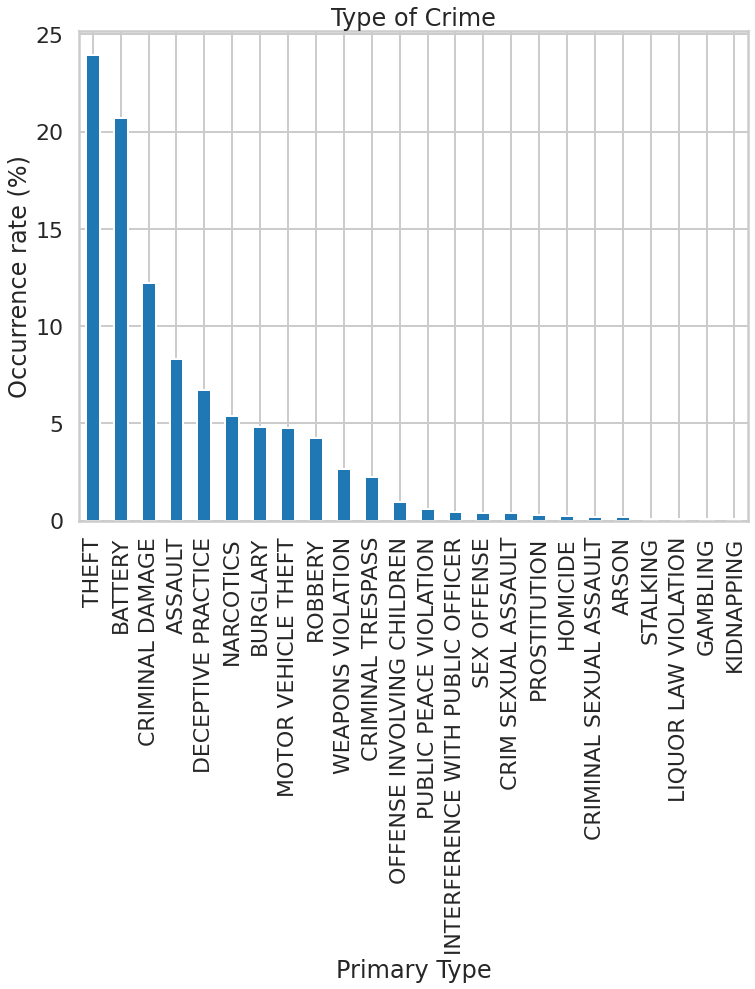

In [ ]:
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

In [ ]:
locationgb=crimedata.groupby(['Location Description'])["Location Description"].count()/len(crimedata)*100
locationgb.sort_values(ascending=False, inplace=True)
print(locationgb)

Location Description
STREET                                    25.943462
RESIDENCE                                 16.889084
APARTMENT                                 15.672101
SIDEWALK                                   9.255784
OTHER                                      3.303348
SMALL RETAIL STORE                         2.864073
PARKING LOT/GARAGE(NON.RESID.)             2.668595
RESTAURANT                                 2.591741
ALLEY                                      2.381581
VEHICLE NON-COMMERCIAL                     1.907980
DEPARTMENT STORE                           1.850495
RESIDENTIAL YARD (FRONT/BACK)              1.773572
RESIDENCE PORCH/HALLWAY                    1.609042
GAS STATION                                1.574096
RESIDENCE-GARAGE                           1.466845
GROCERY FOOD STORE                         1.413357
SCHOOL, PUBLIC, BUILDING                   1.196856
PARK PROPERTY                              0.809415
CONVENIENCE STORE                          

In [ ]:
def topfour(row):
    keep = ["THEFT", "BATTERY", "NARCOTICS", "CRIMINAL DAMAGE"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [ ]:
crimedata["New_Type"] = crimedata["Primary Type"].apply(topfour)

In [ ]:
def plotsplit(cnam, title):
    datasplit = crimedata.groupby([cnam, "New_Type"])[cnam].count().unstack()
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    datasplit = datasplit[['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])

In [ ]:
import matplotlib.pyplot as pltd
pltd.rcParams["figure.figsize"] = (12,9)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
data_large=pd.read_csv('/content/chicago_final_clean.csv')

In [ ]:
data=data_large.sample(80000)
data.shape

(80000, 110)

In [ ]:
data.head(5)

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
449117,11019476,07/15/2017 04:00:00 PM,054XX N SAYRE AVE,0910,AUTOMOBILE,41.0,10.0,07,1128989.0,1935494.0,2017,41.979293,-87.801011,"(41.979292975, -87.801011435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,D16.0,MOTOR VEHICLE THEFT,16:00,20170715,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
929860,10020014,04/03/2015 01:00:00 PM,055XX S HARPER AVE,0850,ATTEMPT THEFT,5.0,41.0,06,1187373.0,1868742.0,2015,41.794927,-87.588432,"(41.794927113, -87.588432435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,D2.0,THEFT,13:00,20150403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1314674,12414477,07/04/2021 09:42:00 PM,081XX S STATE ST,0486,DOMESTIC BATTERY SIMPLE,6.0,44.0,08B,1177709.0,1850976.0,2021,41.746400,-87.624407,"(41.746399622, -87.624406961)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D6.0,BATTERY,21:42,20210704,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.095221,18881,60.0,40.3,24.0,27.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
265446,10839021,02/04/2017 07:10:00 PM,032XX W 58TH ST,051A,AGGRAVATED: HANDGUN,14.0,63.0,04A,1155829.0,1865984.0,2017,41.788051,-87.704179,"(41.788050592, -87.704178541)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D8.0,ASSAULT,19:10,20170204,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.670667,12171,93.0,38.8,18.2,23.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
736974,11492329,10/30/2018 12:23:00 AM,044XX W MADISON ST,0820,$500 AND UNDER,28.0,26.0,06,1146817.0,1899646.0,2018,41.880600,-87.736365,"(41.880600004, -87.736364671)",0,0,0,0,0,0,0,0,0,0

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head(5)

,index,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,...,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,449117,11019476,07/15/2017 04:00:00 PM,054XX N SAYRE AVE,0910,AUTOMOBILE,41.0,10.0,07,1128989.0,1935494.0,2017,41.979293,-87.801011,"(41.979292975, -87.801011435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,D16.0,MOTOR VEHICLE THEFT,16:00,20170715,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,929860,10020014,04/03/2015 01:00:00 PM,055XX S HARPER AVE,0850,ATTEMPT THEFT,5.0,41.0,06,1187373.0,1868742.0,2015,41.794927,-87.588432,"(41.794927113, -87.588432435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,D2.0,THEFT,13:00,20150403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1314674,12414477,07/04/2021 09:42:00 PM,081XX S STATE ST,0486,DOMESTIC BATTERY SIMPLE,6.0,44.0,08B,1177709.0,1850976.0,2021,41.746400,-87.624407,"(41.746399622, -87.624406961)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D6.0,BATTERY,21:42,20210704,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.095221,18881,60.0,40.3,24.0,27.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,265446,10839021,02/04/2017 07:10:00 PM,032XX W 58TH ST,051A,AGGRAVATED: HANDGUN,14.0,63.0,04A,1155829.0,1865984.0,2017,41.788051,-87.704179,"(41.788050592, -87.704178541)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D8.0,ASSAULT,19:10,20170204,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.670667,12171,93.0,38.8,18.2,23.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,736974,11492329,10/30/2018 12:23:00 AM,044XX W MADISON ST,0820,$500 AND UNDER,28.0,26.0,06,1146817.0,1899646.0,2018,41.880600,-87.736365,"(41.880600004, -87.736364671)",0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
data=data.drop(["index"], axis=1)

In [ ]:
data.head(5)

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,11019476,07/15/2017 04:00:00 PM,054XX N SAYRE AVE,0910,AUTOMOBILE,41.0,10.0,07,1128989.0,1935494.0,2017,41.979293,-87.801011,"(41.979292975, -87.801011435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,D16.0,MOTOR VEHICLE THEFT,16:00,20170715,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10020014,04/03/2015 01:00:00 PM,055XX S HARPER AVE,0850,ATTEMPT THEFT,5.0,41.0,06,1187373.0,1868742.0,2015,41.794927,-87.588432,"(41.794927113, -87.588432435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,D2.0,THEFT,13:00,20150403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12414477,07/04/2021 09:42:00 PM,081XX S STATE ST,0486,DOMESTIC BATTERY SIMPLE,6.0,44.0,08B,1177709.0,1850976.0,2021,41.746400,-87.624407,"(41.746399622, -87.624406961)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D6.0,BATTERY,21:42,20210704,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.095221,18881,60.0,40.3,24.0,27.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10839021,02/04/2017 07:10:00 PM,032XX W 58TH ST,051A,AGGRAVATED: HANDGUN,14.0,63.0,04A,1155829.0,1865984.0,2017,41.788051,-87.704179,"(41.788050592, -87.704178541)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D8.0,ASSAULT,19:10,20170204,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.670667,12171,93.0,38.8,18.2,23.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,11492329,10/30/2018 12:23:00 AM,044XX W MADISON ST,0820,$500 AND UNDER,28.0,26.0,06,1146817.0,1899646.0,2018,41.880600,-87.736365,"(41.880600004, -87.736364671)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
data=data.drop(["ID","Date","Block","IUCR","Description","Ward","Community Area","FBI Code"], axis=1)

In [ ]:
data.head(2)

,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,...,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,1128989.0,1935494.0,2017,41.979293,-87.801011,"(41.979292975, -87.801011435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D16.0,MOTOR VEHICLE THEFT,16:00,20170715,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1187373.0,1868742.0,2015,41.794927,-87.588432,"(41.794927113, -87.588432435)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,D2.0,THEFT,13:00,20150403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=data.drop(["X Coordinate","Y Coordinate","Year","Location","District","Primary Type","time_24hour","Date_no_time"], axis=1)

In [ ]:
data.head(2)

,Latitude,Longitude,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,41.979293,-87.801011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,41.794927,-87.588432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
a=list(data.columns.values)
droplist=[]
for i in a:
    if i.startswith("Primary Type"):
        droplist.append(i)
data=data.drop(droplist, axis=1)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(data.shape[0]), train_size=0.7)

In [ ]:
mask=np.ones(data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [ ]:
data.shape

(80000, 70)

In [ ]:
data.head(5)

,Latitude,Longitude,severe,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,41.979293,-87.801011,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.825118,32875,21.0,39.5,9.0,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,41.794927,-87.588432,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.160087,39056,14.0,26.2,8.4,18.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41.746400,-87.624407,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.095221,18881,60.0,40.3,24.0,27.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,41.788051,-87.704179,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.670667,12171,93.0,38.8,18.2,23.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,41.880600,-87.736365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.636941,10934,92.0,43.6,25.8,41.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=data.dropna()

In [ ]:
np.nan_to_num(data)

array([[ 41.97929297, -87.80101144,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.79492711, -87.58843244,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.74639962, -87.62440696,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 42.00640032, -87.69010326,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.72426534, -87.66823509,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.75375065, -87.63681231,   1.        , ...,   0.        ,
          1.        ,   0.        ]])

In [ ]:
STANDARDIZABLE=["Latitude", "Longitude","closest_station","House_below_poverty","Unemployed","Under18_over64","Income","HARDSHIP INDEX"]
INDICATOR=list(data.columns)
INDICATOR.remove(u'severe')

In [ ]:
print (len(STANDARDIZABLE), len(INDICATOR))

8 69


In [ ]:
from sklearn.preprocessing import StandardScaler
data.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[mask,STANDARDIZABLE])
data.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[~mask,STANDARDIZABLE])

In [ ]:
pos=data[data['severe']==1]
neg=data[data['severe']==0]
percent_severe=float(len(pos))/len(data)
percent_non_severe=float(len(neg))/len(data)
print (percent_severe, percent_non_severe)

0.490575 0.509425


In [ ]:
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
model_dict={}
accuracy_dict={}
accuracy_dict1={}
train_not_severe_percent=1-float(sum(data["severe"].values[mask]))/len(data["severe"].values[mask])
test_not_severe_percent=1-float(sum(data["severe"].values[~mask]))/len(data["severe"].values[~mask])
print (train_not_severe_percent, test_not_severe_percent) 
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

0.5081428571428571 0.5124166666666667


In [ ]:
total_features=STANDARDIZABLE+INDICATOR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print ("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

In [ ]:
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [ ]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(C=1, penalty='l1', solver='liblinear')
clflog, Xtrain, ytrain, Xtest, ytest, confclflog, training_accuracy, test_accuracy=do_classify(clflog, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, data, total_features, u'severe', 1, mask=mask)
confusion_dict["Logistic"]=confclflog
model_dict["Logistic"]=clflog
accuracy_dict["Logistic"]=training_accuracy
accuracy_dict1["Logistic"]=test_accuracy

Training accuracy: 0.62
Test accuracy:     0.62
[[7508 4790]
 [4404 7298]]
LogisticRegression(penalty='l1', solver='liblinear')


Linear SVM

In [ ]:
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
clfsvm, Xtrain, ytrain, Xtest, ytest, confclfsvm, training_accuracy, test_accuracy= do_classify(clfsvm, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 50, 100.0]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["svm"]=confclfsvm
model_dict["svm"]=clfsvm
accuracy_dict["svm"]=training_accuracy
accuracy_dict1["svm"]=test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Training accuracy: 0.60
Test accuracy:     0.60
[[6692 5606]
 [4086 7616]]
LinearSVC(C=0.001, loss='hinge')


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest, confclfdt, training_accuracy, test_accuracy = do_classify(clfdt, {"max_depth":np.arange(1,20,2)}, data, total_features, u'severe',1, mask=mask)
confusion_dict["decision tree"]=confclfdt
model_dict["decision tree"]=clfdt
accuracy_dict["decision tree"]=training_accuracy
accuracy_dict1["decision tree"]=test_accuracy

Training accuracy: 0.62
Test accuracy:     0.62
[[9455 2843]
 [6317 5385]]
DecisionTreeClassifier(max_depth=7)


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
clfrdf, Xtrain, ytrain, Xtest, ytest, confrdf, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["Random forest"]=confrdf
model_dict["Random forest"]=clfrdf
accuracy_dict["Random forest"]=training_accuracy
accuracy_dict1["Random forest"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.60
[[7614 4684]
 [4805 6897]]
RandomForestClassifier()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh, Xtrain1, ytrain1, Xtest1, ytest1, confknn, training_accuracy, test_accuracy=do_classify(neigh, {"n_neighbors":[5, 10, 20, 40]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["KNN"]=confknn
model_dict["KNN"]=neigh
accuracy_dict["KNN"]=training_accuracy
accuracy_dict1["KNN"]=test_accuracy

Training accuracy: 0.64
Test accuracy:     0.61
[[7741 4557]
 [4878 6824]]
KNeighborsClassifier(n_neighbors=40)


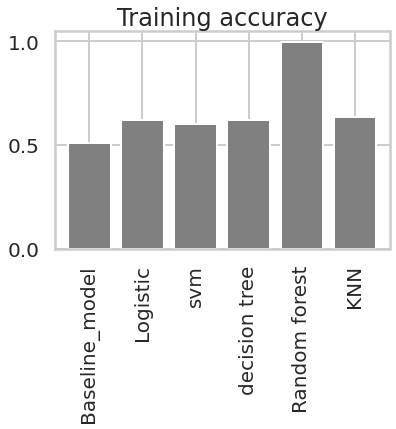

In [ ]:
pd.Series(accuracy_dict).plot(kind="bar",title="Training accuracy",width=0.8,color="grey", fontsize=20)

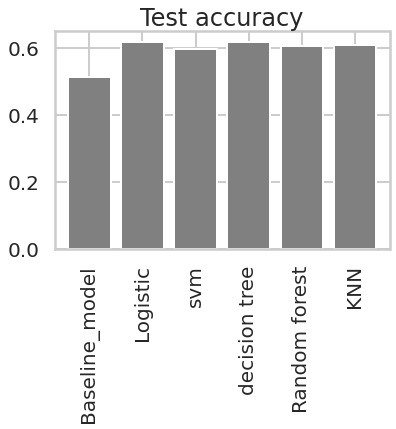

In [ ]:
pd.Series(accuracy_dict1).plot(kind="bar",title="Test accuracy",width=0.8, color="grey",fontsize=20)

In [ ]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=total_features, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort_values('abscoef', ascending=False)
lasso_importances=nonzero_lasso(clflog)
lasso_importances.head(50)

,feature,coef,abscoef
59,Location Description_DEPARTMENT STORE,-1.453449,1.453449
72,"Location Description_SCHOOL, PUBLIC, BUILDING",1.217077,1.217077
62,Location Description_GROCERY FOOD STORE,-0.730073,0.730073
54,Location Description_APARTMENT,0.724541,0.724541
63,Location Description_OTHER (SPECIFY),-0.674048,0.674048
74,Location Description_SMALL RETAIL STORE,-0.674008,0.674008
73,Location Description_SIDEWALK,0.609346,0.609346
60,Location Description_DRUG STORE,-0.606430,0.606430
69,Location Description_RESIDENCE-GARAGE,-0.501625,0.501625
37,Timeblock_3,0.480060,0.480060


In [ ]:
data2=data_large.sample(80000)
data2=data2.drop(["ID","Date","Block","IUCR","Description","Ward","Community Area","FBI Code","severe"], axis=1)
data2=data2.drop(["X Coordinate","Y Coordinate","Year","Location","District","time_24hour","Date_no_time"], axis=1)
data2.head()

,Latitude,Longitude,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
610292,41.871645,-87.724159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MOTOR VEHICLE THEFT,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.969215,10934,92.0,43.6,25.8,41.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
988665,41.932185,-87.686487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.950095,20039,42.0,31.0,9.2,15.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
104307,41.918397,-87.719254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.135580,31908,23.0,26.2,8.2,16.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45199,41.988802,-87.792792,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ASSAULT,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.703279,32875,21.0,39.5,9.0,5.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229394,41.903723,-87.709972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.361607,13781,85.0,38.0,17.3,33.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
np.nan_to_num(data2)
data2 = data2.fillna(data2.mean())
data2 = data2.dropna()

data2.isnull().values.any()
data2.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0

In [ ]:
print(data2.shape)
data2["Crime_interested"]=data2["Primary Type_THEFT"]+data2["Primary Type_BATTERY"]+data2["Primary Type_NARCOTICS"]+data2["Primary Type_CRIMINAL DAMAGE"]
data2=data2[data2["Crime_interested"]==1]
print(data2.shape)
data2.head()

(80000, 94)
(50085, 95)


,Latitude,Longitude,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Crime_interested
988665,41.932185,-87.686487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.950095,20039,42.0,31.0,9.2,15.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
104307,41.918397,-87.719254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.135580,31908,23.0,26.2,8.2,16.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
229394,41.903723,-87.709972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.361607,13781,85.0,38.0,17.3,33.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
736551,41.922441,-87.692061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.291966,31908,23.0,26.2,8.2,16.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
606488,41.917126,-87.729587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.673660,15089,71.0,36.4,13.1,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
def get_categorical_integer(row):
    if row=="THEFT":
        return int(0)
    elif row=="BATTERY":
        return int(1)
    elif row=="CRIMINAL DAMAGE":
        return int(2)
    elif row=="NARCOTICS":
        return int(3)
data2["category"]=data2["Primary Type"].apply(get_categorical_integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data2 = data2.reset_index(drop=True)
data2.head()

,Latitude,Longitude,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Crime_interested,category
0,41.932185,-87.686487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.950095,20039,42.0,31.0,9.2,15.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,41.918397,-87.719254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.135580,31908,23.0,26.2,8.2,16.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3
2,41.903723,-87.709972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.361607,13781,85.0,38.0,17.3,33.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2
3,41.922441,-87.692061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.291966,31908,23.0,26.2,8.2,16.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,41.917126,-87.729587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.673660,15089,71.0,36.4,13.1,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3


In [ ]:
def do_classify2(clf, parameters, indf, featurenames,targetname, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=indf[targetname]
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print( "Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy

In [ ]:
mask=np.ones(data2.shape[0], dtype='int')
itrain, itest = train_test_split(range(data2.shape[0]), train_size=0.7)
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [ ]:
data2.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data2.loc[mask,STANDARDIZABLE])
data2.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data2.loc[~mask,STANDARDIZABLE])
data2.head()

,Latitude,Longitude,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_DRUG STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_OTHER (SPECIFY),Location Description_PARK PROPERTY,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Crime_interested,category
0,1.025795,-0.277773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,-0.426857,-0.357453,-0.338359,-0.397589,-0.940499,-0.895350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.863081,-0.864189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.129646,0.230933,-0.957824,-0.960317,-1.062957,-0.753860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3
2,0.690899,-0.689947,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.219668,-0.670429,1.059650,0.422400,0.093181,0.909156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2
3,0.911148,-0.375590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-1.460841,0.236139,-0.956084,-0.959868,-1.068114,-0.749825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.848608,-1.034194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NARCOTICS,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.709933,-0.605013,0.604484,0.234974,-0.442801,-0.390864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3


In [ ]:
print(float(len(data2[data2["category"]==0]))/len(data2))
train_theft_percent=float(sum(data2["Primary Type_THEFT"].values[mask]))/len(data2["Primary Type_THEFT"].values[mask])
test_theft_percent=float(sum(data2["Primary Type_THEFT"].values[~mask]))/len(data2["Primary Type_THEFT"].values[~mask])

print(train_theft_percent)
print(test_theft_percent)

accuracy_multi_train={}
accuracy_multi_test={}
accuracy_multi_train["Baseline model"]=train_theft_percent
accuracy_multi_test["Baseline model"]=test_theft_percent

0.3802336028751123
0.38138566416611996
0.37754558764807666


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfdt_multi=DecisionTreeClassifier()
clfdt_multi, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clfdt_multi, {"max_depth":np.arange(1,20,2)}, data2, total_features, "category", mask=mask)
accuracy_multi_train["Decision tree multiclass"]=training_accuracy
accuracy_multi_test["Decision tree multiclass"]=test_accuracy

Training accuracy: 0.55
Test accuracy:     0.54
[[3782 1142  667   82]
 [1221 3205  488  208]
 [1069 1067  700   77]
 [ 298  299  316  405]]
DecisionTreeClassifier(max_depth=7)


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfmulti=RandomForestClassifier()
randfmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(randfmulti, {"n_estimators":[10, 20, 30, 40, 100]}, data2, total_features, "category", mask=mask)
accuracy_multi_train["Random forest multiclass"]=training_accuracy
accuracy_multi_test["Random forest multiclass"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.52
[[3771 1232  555  115]
 [1279 3047  555  241]
 [1172 1049  590  102]
 [ 289  411  156  462]]
RandomForestClassifier()


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clflogmulti=LogisticRegression(penalty="l2",multi_class='multinomial',solver="newton-cg",max_iter=100)
clflogmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, data2, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - newton cg"]=training_accuracy
accuracy_multi_test["Logistic - newton cg"]=test_accuracy

Training accuracy: 0.55
Test accuracy:     0.56
[[3961 1233  398   81]
 [1191 3470  272  189]
 [1239 1102  493   79]
 [ 363  350  167  438]]
LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')


In [ ]:
from sklearn.linear_model import LogisticRegression
clflogmulti2 = LogisticRegression(penalty="l2",multi_class='multinomial',solver="lbfgs",max_iter=400)
clflogmulti2, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti2, {"C": [0.01, 0.1, 1.0, 10.0]}, data2, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - lbfgs"]=training_accuracy
accuracy_multi_test["Logistic - lbfgs"]=test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Training accuracy: 0.55
Test accuracy:     0.56
[[3961 1233  398   81]
 [1191 3470  272  189]
 [1240 1101  493   79]
 [ 363  350  167  438]]
LogisticRegression(C=0.1, max_iter=400, multi_class='multinomial')


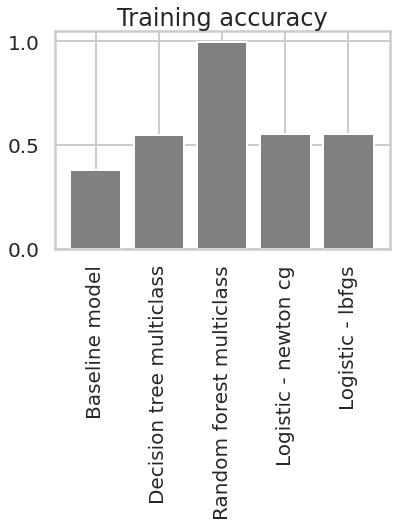

In [ ]:
pd.Series(accuracy_multi_train).plot(kind="bar",title="Training accuracy",width=0.8,color="grey", fontsize=20)

In [ ]:
total_predict=len(ytest)
correct_predict=0
baseline_accuracy=0
for i in range(0,total_predict):
    if ((ytest.iloc[i]==0) | (ytest.iloc[i]==1)):
        correct_predict += 1
    if ytest.iloc[i]==0:
        baseline_accuracy += 1
print(float(correct_predict)/total_predict)

0.7184214029016371


In [ ]:
def accuracy_two_type(est, Xtest, ytest):
    probs=est.predict_proba(Xtest)
    correct_predict=0
    total_predict=len(ytest)
    for i in range(0,total_predict):
        ind=np.argpartition(probs[i,],-2)[-2:]
        if ytest.iloc[i] in ind:
            correct_predict+=1
        i+=1
    return float(correct_predict)/total_predict

In [ ]:
print(accuracy_two_type(clflogmulti, Xtest, ytest))
print(accuracy_two_type(clflogmulti2, Xtest, ytest))

0.7964860907759883
0.7965526420870491


In [ ]:
lasso_importances_multi=nonzero_lasso(clflogmulti)
lasso_importances_multi.head(50)

,feature,coef,abscoef
59,Location Description_DEPARTMENT STORE,1.432457,1.432457
53,Location Description_ALLEY,-1.215102,1.215102
62,Location Description_GROCERY FOOD STORE,1.080277,1.080277
73,Location Description_SIDEWALK,-0.937635,0.937635
74,Location Description_SMALL RETAIL STORE,0.933719,0.933719
60,Location Description_DRUG STORE,0.797568,0.797568
57,Location Description_CONVENIENCE STORE,0.795745,0.795745
72,"Location Description_SCHOOL, PUBLIC, BUILDING",-0.619920,0.619920
54,Location Description_APARTMENT,-0.593214,0.593214
67,Location Description_RESIDENCE,-0.464744,0.464744
